<a href="https://colab.research.google.com/github/AtaruOhto/pytorch_learning/blob/master/003_digits_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

正解率 95 %


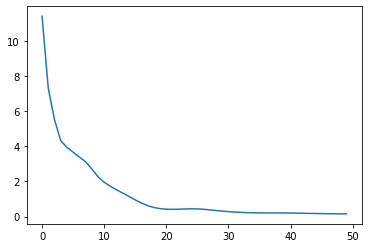

In [7]:
"""
# ロジスティック回帰
0から9までの10個の手書き文字の分類
# 参照: https://www.shoeisha.co.jp/book/detail/9784798157184
"""

import torch
from torch import nn, optim

from sklearn.datasets import load_digits

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
# 0から9までの10個の手書き文字のデータをロードする
digits = load_digits()


X = digits.data
y = digits.target

# データ データ形式: torch.Size([1797, 64]) GPUで実行
X = torch.tensor(X, dtype=torch.float32).to("cuda:0")


# 正解 データ形式: torch.Size([1797]) GPUで実行
y = torch.tensor(y, dtype=torch.int64).to("cuda:0")

# yは右記の10通り: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} GPUで実行
net = nn.Linear(X.size()[1], len(set(y.tolist()))).to("cuda:0")

loss_function = nn.CrossEntropyLoss()


optimizer = optim.Adam(net.parameters(), lr=0.01)
losses = []

for _ in range(50):
  optimizer.zero_grad()
  y_pred = net(X)
  loss = loss_function(y_pred, y)
  loss.backward()
  optimizer.step()
  losses.append(loss.item())
  
_, y_pred = torch.max(net(X), 1)
accuracy_score = (y_pred == y).sum().item() / len(y)
print("正解率", int(accuracy_score * 100), "%")

%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)